In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 2 notebook

## Preliminaries

In [2]:
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))

print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))

print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 2A: Individual posterior mean values for bout duration and feeding rate

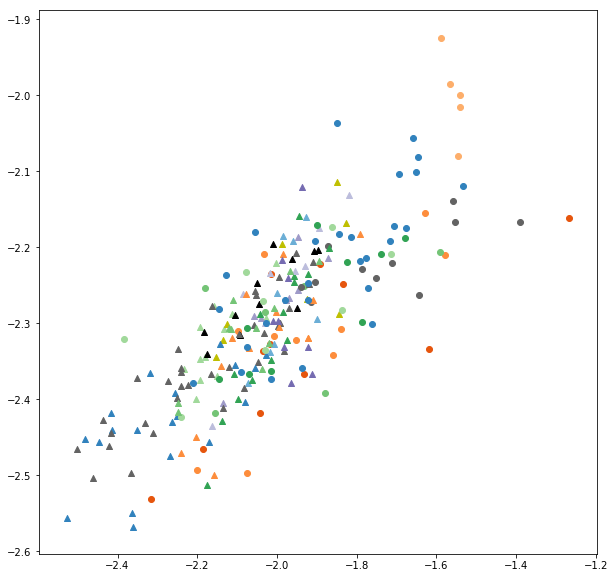

In [8]:
reload(plots)
reload(helpers)

fig, axes = plots.pairplot(df, 'theta1', 'theta2', ctype='drug_c')

plt.show()

## Figure 2B: Trellis plot of bout duration, stomach-independent and stomach-dependent intermeal interval

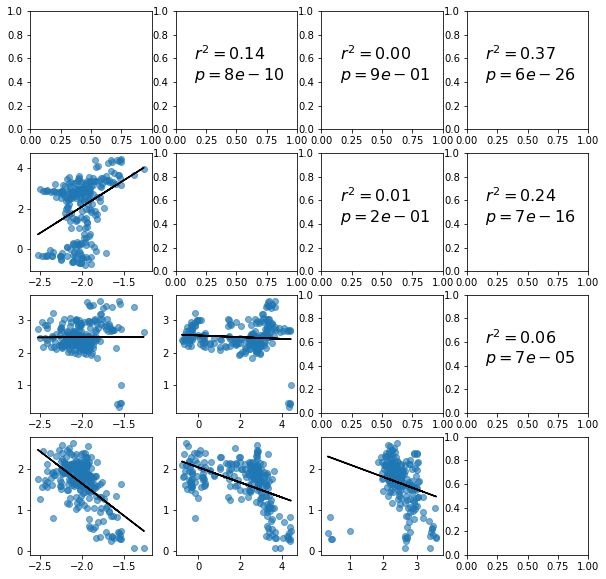

In [4]:
reload(plots)
reload(helpers)

varlist = ['theta1', 'theta7', 'theta8', 'rate']
fig, axes = plots.trellisplot(df, varlist)

plt.show()

## Figure 2C, 2D: Group-level posteriors of bout duration and intake rate

['PYY', '300.0', 'A', 'D']
['saline', '0.0', 'R', 'D']
['LiCl', '64.0', 'R', 'L']
['GLP-1', '100.0', 'A', 'D']
['LiCl', '32.0', 'A', 'D']
['PYY', '300.0', 'R', 'L']
['PYY', '7.5', 'R', 'L']
['PYY', '1.5', 'A', 'D']
['saline', '0.0', 'A', 'L']
['LiCl', '32.0', 'R', 'L']
['saline', '0.0', 'R', 'L']
['vehicle', '0.0', 'A', 'D']
['sib', '0.9', 'A', 'D']
['GLP-1', '30.0', 'A', 'D']
['PYY', '7.5', 'A', 'D']
['PYY', '1.5', 'R', 'L']
['saline', '0.0', 'A', 'D']
['LiCl', '16.0', 'R', 'L']
['Lep', '2.0', 'A', 'D']
['GLP-1', '300.0', 'A', 'D']
['Ex-4', '0.3', 'A', 'D']


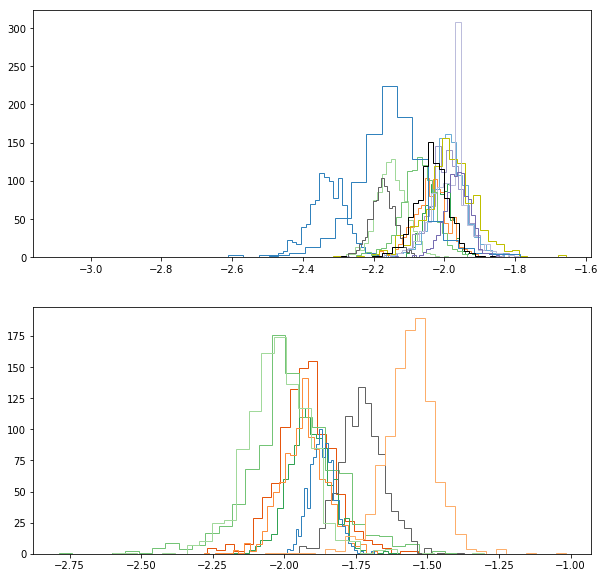

In [5]:
reload(plots)
reload(helpers)

fig, axes = plots.univariate_posterior(group_dict, 0, numbins=30)

plt.show()